In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.display import display

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10) # set default size of plots

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context("talk")
sns.set_palette('Set2', 10)
pd.set_option('display.max_columns', None)

In [289]:
with gzip.open('gtfs_stats_hack/2019-03-07_route_stats.pkl.gz', 'rb') as f:
    a = pickle.load(f)
with gzip.open('gtfs_stats_hack/2019-03-07_trip_stats.pkl.gz', 'rb') as f:
    b = pickle.load(f)

In [290]:
a

,route_id,route_short_name,agency_id,agency_name,route_long_name,route_type,route_mkt,route_direction,route_alternative,num_trips,num_trip_starts,num_trip_ends,is_loop,is_bidirectional,start_time,end_time,max_headway,min_headway,mean_headway,peak_num_trips,peak_start_time,peak_end_time,service_distance,service_duration,service_speed,mean_trip_distance,mean_trip_duration,start_stop_id,end_stop_id,start_stop_name,end_stop_name,start_stop_city,end_stop_city,start_stop_desc,end_stop_desc,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,num_stops,start_zone,end_zone,num_zones,num_zones_missing,all_stop_latlon,all_stop_code,all_stop_id,all_stop_desc_city,all_start_time,all_trip_id,date,gtfs_file_name
0,1,1,25,אפיקים,ת. רכבת יבנה מערב-יבנה<->ת. רכבת יבנה מזרח-יבנ...,3,67001,1,#,26,26,26,0,0,05:10:00,21:54:38,65.0,20.0,37.8125,1,05:10:00,05:29:38,183144,8.507778,21.526655,7044.0,0.327222,38725,15745,ת. רכבת יבנה מערב,ת. רכבת יבנה מזרח,יבנה,יבנה,רחוב: עיר: יבנה רציף: קומה:,רחוב: עיר: יבנה רציף: קומה:,31.890700,34.731191,31.862123,34.744215,19,רחובות,רחובות,1,0,"31.8907,34.731190999999995;31.887865,34.734514...",37471;31272;31273;31512;31513;31556;31514;3151...,38725;15582;15583;15736;15737;15778;15738;1573...,יבנה;יבנה;יבנה;יבנה;יבנה;יבנה;יבנה;יבנה;יבנה;י...,05:10:00;05:40:00;06:00:00;06:20:00;08:45:00;0...,30900053_070319;30900054_070319;30900055_07031...,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
1,10,4,25,אפיקים,ת. רכבת יבנה מזרח-יבנה<->ת. רכבת יבנה מערב-יבנ...,3,47004,2,#,35,35,35,0,0,06:05:00,22:50:38,50.0,10.0,28.0000,2,15:55:00,16:05:38,280490,12.036111,23.304039,8014.0,0.343889,15745,38725,ת. רכבת יבנה מזרח,ת. רכבת יבנה מערב,יבנה,יבנה,רחוב: עיר: יבנה רציף: קומה:,רחוב: עיר: יבנה רציף: קומה:,31.862123,34.744215,31.890700,34.731191,25,רחובות,רחובות,1,0,"31.862122999999997,34.744215000000004;31.86247...",31521;31225;31307;31517;31518;31227;31228;3253...,15745;15538;15598;15741;15742;15539;15540;1646...,יבנה;יבנה;יבנה;יבנה;יבנה;יבנה;יבנה;יבנה;יבנה;י...,06:05:00;06:25:00;07:05:00;07:25:00;08:05:00;0...,25228243_070319;25228244_070319;25228245_07031...,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
2,10000,91,14,נתיב אקספרס,קופת חולים/הנשיא-צפת<->דרך חטיבת יפתח-צפת-11,3,27091,1,1,1,1,1,0,0,08:00:00,08:17:31,NaN,NaN,NaN,1,08:00:00,08:17:31,6326,0.291944,21.668506,6326.0,0.291944,18423,38800,קופת חולים/הנשיא,דרך חטיבת יפתח,צפת,צפת,רחוב:הנשיא עיר: צפת רציף: קומה:,רחוב:דרך חטיבת יפתח עיר: צפת רציף: קומה:,32.960472,35.495491,32.968445,35.494423,23,גליל עליון ורמת הגולן,גליל עליון ורמת הגולן,1,0,"32.960471999999996,35.495490999999994;32.95867...",51090;58004;51173;58005;58006;51094;51148;5115...,18423;5617;18496;5618;5619;18426;18477;18484;1...,צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפ...,08:00:00,15441277_070319,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
3,10001,91,14,נתיב אקספרס,האר''י/ישראל ב''ק-צפת<->שפרינצק/קרן היסוד-צפת-2#,3,27091,2,#,5,5,5,0,0,13:00:00,16:51:42,150.0,0.0,52.5000,2,13:00:00,13:21:42,41880,1.808333,23.159447,8376.0,0.361667,37179,18420,האר''י/ישראל ב''ק,שפרינצק/קרן היסוד,צפת,צפת,רחוב:האר''י 4 עיר: צפת רציף: קומה:,רחוב:שפרינצק עיר: צפת רציף: קומה:,32.971863,35.493324,32.958485,35.494245,26,גליל עליון ורמת הגולן,גליל עליון ורמת הגולן,1,0,"32.971863,35.493324;32.966725,35.495154;32.963...",55797;51087;59922;51102;51090;57027;57028;5800...,37179;18421;7216;18434;18423;5242;5243;5617;56...,צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפת;צפ...,13:00:00;16:30:00;14:00:00;16:30:00;13:00:00,35390699_070319;35390704_070319;35390709_07031...,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
4,10002,92,14,נתיב אקספרס,געתון/מירון-כפר ורדים<->בית ספר כפר ורדים-כפר ...,3,25092,1,#,1,1,1,0,0,07:30:00,07:53:25,NaN,NaN,NaN,1,07:30:00,07:53:25,7340,0.390278,18.807117,7340.0,0.390278,7270,17976,געתון/מירון,בית ספר כפר ורדים,כפר ורדים,כפר ורדים,רחוב:מירון 69 עיר: כפר ורדים רציף: קומה:,רחוב:אשכר עיר: כפר ורדים רציף: קומה:,32.992835,35.258030,32.996105,35.277132,17,נהריה,נה

In [291]:
b

,trip_id,route_id,route_short_name,route_long_name,route_mkt,route_direction,route_alternative,agency_id,agency_name,route_type,direction_id,shape_id,num_stops,start_time,end_time,start_stop_id,end_stop_id,start_stop_code,end_stop_code,start_stop_name,end_stop_name,start_stop_desc,end_stop_desc,start_stop_lat,end_stop_lat,start_stop_lon,end_stop_lon,start_stop_city,end_stop_city,start_zone,end_zone,num_zones,num_zones_missing,is_loop,duration,all_stop_latlon,all_stop_code,all_stop_id,all_stop_desc_city,distance,speed,date,gtfs_file_name
0,10096398_070319,9735,70,קניון קרני שומרון-קרני שומרון<->אוניברסיטת ארי...,27070,2,1,25,אפיקים,3,1,88862,37,21:00:00,22:05:22,34657,34503,63436,63275,קניון קרני שומרון,אוניברסיטת אריאל/כביש 31,רחוב:שדרות רחבעם עיר: קרני שומרון רציף: קומה:,רחוב:31 כביש עיר: אריאל רציף: קומה:,32.174395,32.105926,35.091190,35.210692,קרני שומרון,אריאל,השומרון,השומרון,1,0,0,1.089444,"32.174395000000004,35.091190000000005;32.17520...",63436;65268;63200;63213;65290;63208;63198;6359...,34657;35317;34436;34444;35506;34443;34434;3480...,קרני שומרון;קרני שומרון;קרני שומרון;קרני שומרו...,45786,42.026925,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
1,10096399_070319,9735,70,קניון קרני שומרון-קרני שומרון<->אוניברסיטת ארי...,27070,2,1,25,אפיקים,3,1,88862,37,23:00:00,24:05:22,34657,34503,63436,63275,קניון קרני שומרון,אוניברסיטת אריאל/כביש 31,רחוב:שדרות רחבעם עיר: קרני שומרון רציף: קומה:,רחוב:31 כביש עיר: אריאל רציף: קומה:,32.174395,32.105926,35.091190,35.210692,קרני שומרון,אריאל,השומרון,השומרון,1,0,0,1.089444,"32.174395000000004,35.091190000000005;32.17520...",63436;65268;63200;63213;65290;63208;63198;6359...,34657;35317;34436;34444;35506;34443;34434;3480...,קרני שומרון;קרני שומרון;קרני שומרון;קרני שומרו...,45786,42.026925,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
2,10221383_070319,9194,102,קופת חולים כללית-ברכה<->קופת חולים לאומית/דרך ...,14102,2,2,25,אפיקים,3,1,102735,18,14:45:00,15:21:07,34583,34654,63362,63433,קופת חולים כללית,קופת חולים לאומית/דרך הנחשונים,רחוב: עיר: ברכה רציף: קומה:,רחוב:דרך הנחשונים 43 עיר: אריאל רציף: קומה:,32.191886,32.105873,35.265131,35.171849,ברכה,אריאל,השומרון,השומרון,1,0,0,0.601944,"32.191886,35.265131;32.193678000000006,35.2678...",63362;63363;61249;63358;63340;63339;63342;6327...,34583;34584;41248;34579;34562;34561;34564;3450...,ברכה;ברכה;שומרון;שומרון;כפר תפוח;כפר תפוח;שומר...,30769,51.116013,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
3,10221384_070319,9194,102,קופת חולים כללית-ברכה<->קופת חולים לאומית/דרך ...,14102,2,2,25,אפיקים,3,1,102735,18,15:50:00,16:26:07,34583,34654,63362,63433,קופת חולים כללית,קופת חולים לאומית/דרך הנחשונים,רחוב: עיר: ברכה רציף: קומה:,רחוב:דרך הנחשונים 43 עיר: אריאל רציף: קומה:,32.191886,32.105873,35.265131,35.171849,ברכה,אריאל,השומרון,השומרון,1,0,0,0.601944,"32.191886,35.265131;32.193678000000006,35.2678...",63362;63363;61249;63358;63340;63339;63342;6327...,34583;34584;41248;34579;34562;34561;34564;3450...,ברכה;ברכה;שומרון;שומרון;כפר תפוח;כפר תפוח;שומר...,30769,51.116013,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
4,10292410_070319,9631,291,מגאר ג'/מרכז-מגאר<->סחנין משרד הרישוי-סח'נין-1#,10291,1,#,7,נסיעות ותיירות,3,0,84207,13,08:10:00,08:43:40,6382,21290,59054,54154,מגאר ג'/מרכז,סחנין משרד הרישוי,רחוב:806 עיר: מגאר רציף: קומה:,רחוב:אלגליל עיר: סח'נין רציף: קומה:,32.888569,32.860660,35.408358,35.308680,מגאר,סח'נין,כרמיאל,כרמיאל,1,0,0,0.561111,"32.888569,35.408358;32.886637,35.411604;32.882...",59054;57297;57298;54128;57299;57300;52030;5139...,6382;5489;5490;21264;5491;5492;19253;18679;211...,מגאר;מגאר;מגאר;מגאר;עיילבון;דייר חנא;עראבה;ערא...,14414,25.688317,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96406,9957962_070319,11077,211,דרך ז'בוטינסקי/רבי עקיבא-בני ברק<->ערבי הנחל/ה...,10211,2,1,25,אפיקים,715,1,1039

In [6]:
a[['route_short_name', 'agency_id', 'start_time']]

,route_short_name,agency_id,start_time
0,1,25,05:10:00
1,4,25,06:05:00
2,91,14,08:00:00
3,91,14,13:00:00
4,92,14,07:30:00
...,...,...,...
6720,90,14,07:35:00
6721,90,14,07:10:00
6722,90,14,07:30:00
6723,90,14,07:12:00


In [7]:
route = a.loc[(a.route_short_name=='64') & (a.agency_name=='אפיקים')]

In [8]:
route

,route_id,route_short_name,agency_id,agency_name,route_long_name,route_type,route_mkt,route_direction,route_alternative,num_trips,num_trip_starts,num_trip_ends,is_loop,is_bidirectional,start_time,end_time,max_headway,min_headway,mean_headway,peak_num_trips,peak_start_time,peak_end_time,service_distance,service_duration,service_speed,mean_trip_distance,mean_trip_duration,start_stop_id,end_stop_id,start_stop_name,end_stop_name,start_stop_city,end_stop_city,start_stop_desc,end_stop_desc,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,num_stops,start_zone,end_zone,num_zones,num_zones_missing,all_stop_latlon,all_stop_code,all_stop_id,all_stop_desc_city,all_start_time,all_trip_id,date,gtfs_file_name
3089,17905,64,25,אפיקים,ספורטק/הרב עובדיה יוסף-פתח תקווה<->ת. מרכזית ת...,3,26064,1,0,72,72,72,0,0,05:05:00,23:13:17,20.0,10.0,13.333333,6,11:50:00,11:53:17,1286136,63.940000,20.114733,17863.0,0.888056,16281,13319,ספורטק/הרב עובדיה יוסף,ת. מרכזית ת''א ק. 7/הורדה,פתח תקווה,תל אביב יפו,רחוב:הרב עובדיה יוסף עיר: פתח תקווה רציף: ק...,רחוב:תחנה מרכזית קומה 7 עיר: תל אביב יפו רציף...,32.081556,34.906091,32.055636,34.780466,40,גוש דן,גוש דן,1,0,"32.081556,34.906090999999996;32.08276,34.90306...",32352;38304;31593;31191;32492;31607;31606;3233...,16281;25267;15803;15522;16416;15813;15812;1626...,פתח תקווה;פתח תקווה;פתח תקווה;פתח תקווה;פתח תק...,05:05:00;05:25:00;05:45:00;06:00:00;06:15:00;0...,36139900_070319;36139901_070319;36139902_07031...,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
3090,17906,64,25,אפיקים,ת.מרכזית ת''א ק.7/רציפים-תל אביב יפו<->הרב עוב...,3,26064,2,0,71,71,69,0,0,06:15:00,24:34:43,45.0,10.0,13.846154,6,12:50:00,12:54:43,1378039,64.748056,21.283095,19409.0,0.911944,36198,16282,ת.מרכזית ת''א ק.7/רציפים,הרב עובדיה יוסף/יקותיאל אדם,תל אביב יפו,פתח תקווה,רחוב:תמח''ת קומה 7 עיר: תל אביב יפו רציף: 8 ...,רחוב:הרב עובדיה יוסף עיר: פתח תקווה רציף: ק...,32.056413,34.779452,32.082103,34.904194,38,גוש דן,גוש דן,1,0,"32.056413,34.779452;32.056416999999996,34.7764...",22955;21554;27124;21752;21179;21397;21721;2148...,36198;13150;14376;13233;12904;13055;13223;1311...,תל אביב יפו;תל אביב יפו;תל אביב יפו;תל אביב יפ...,06:15:00;06:45:00;07:00:00;07:45:00;08:15:00;0...,36140341_070319;36140342_070319;36140343_07031...,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
4287,23377,64,25,אפיקים,ספורטק/הרב עובדיה יוסף-פתח תקווה<->ת. מרכזית ת...,3,26064,1,1,5,5,3,0,0,00:00:00,24:34:37,NaN,NaN,NaN,3,23:20:00,23:34:37,90115,4.551389,19.799451,18023.0,0.910278,16281,13355,ספורטק/הרב עובדיה יוסף,ת. מרכזית ת''א/לוינסקי,פתח תקווה,תל אביב יפו,רחוב:הרב עובדיה יוסף עיר: פתח תקווה רציף: ק...,רחוב:לוינסקי 113 עיר: תל אביב יפו רציף: קומה:,32.081556,34.906091,32.056456,34.780692,41,גוש דן,גוש דן,1,0,"32.081556,34.906090999999996;32.08276,34.90306...",32352;38304;31593;31191;32492;31607;31606;3233...,16281;25267;15803;15522;16416;15813;15812;1626...,פתח תקווה;פתח תקווה;פתח תקווה;פתח תקווה;פתח תק...,00:00:00;22:40:00;23:00:00;23:20:00;23:40:00,35686499_070319;35686500_070319;35686501_07031...,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...
4288,23378,64,25,אפיקים,ת. מרכזית ת''א/לוינסקי-תל אביב יפו<->הרב עובדי...,3,26064,2,1,5,5,5,0,0,00:00:00,02:12:37,NaN,NaN,NaN,3,00:40:00,00:52:37,93925,4.384722,21.420969,18785.0,0.876944,13355,16282,ת. מרכזית ת''א/לוינסקי,הרב עובדיה יוסף/יקותיאל אדם,תל אביב יפו,פתח תקווה,רחוב:לוינסקי 113 עיר: תל אביב יפו רציף: קומה:,רחוב:הרב עובדיה יוסף עיר: פתח תקווה רציף: ק...,32.056456,34.780692,32.082103,34.904194,37,גוש דן,גוש דן,1,0,"32.056456,34.780691999999995;32.058355,34.7775...",24090;27124;21752;21179;21397;21721;21484;2173...,13355;14376;13233;12904;13055;13223;13111;1322...,תל אביב יפו;תל אביב יפו;תל אביב יפו;תל אביב יפ...,00:00:00;00:20:00;00:40:00;01:00:00;01:20:00,33629226_070319;33629230_070319;33629234_07031...,2019-03-07,2019-03-07T21-50-11_israel-public-transportati...


In [9]:
line = b.loc[b.route_mkt=='26064'][['route_id', 'start_time', 'end_time']]
# line = b.loc[b.route_mkt=='26064'][['route_id', 'route_long_name', 'start_time', 'end_time', 'duration']]

In [10]:
line

,route_id,start_time,end_time
32970,23378,00:00:00,00:52:37
32971,23378,00:20:00,01:12:37
32972,23378,00:40:00,01:32:37
32973,23378,01:00:00,01:52:37
32974,23378,01:20:00,02:12:37
...,...,...,...
47468,17906,14:20:00,15:14:43
47469,17906,14:30:00,15:24:43
47470,17906,14:40:00,15:34:43
47471,17906,14:50:00,15:44:43


In [11]:
def trip_length(row):
    try:
        start = datetime.datetime.strptime(row['start_time'], '%H:%M:%S')
        end = datetime.datetime.strptime(row['end_time'], '%H:%M:%S')
        return end - start
    except:
        return 0

In [12]:
line['duration'] = line.apply(trip_length, axis=1)

In [13]:
line =line.drop('end_time', axis=1)
line

,route_id,start_time,duration
32970,23378,00:00:00,0:52:37
32971,23378,00:20:00,0:52:37
32972,23378,00:40:00,0:52:37
32973,23378,01:00:00,0:52:37
32974,23378,01:20:00,0:52:37
...,...,...,...
47468,17906,14:20:00,0:54:43
47469,17906,14:30:00,0:54:43
47470,17906,14:40:00,0:54:43
47471,17906,14:50:00,0:54:43


In [14]:
line

,route_id,start_time,duration
32970,23378,00:00:00,0:52:37
32971,23378,00:20:00,0:52:37
32972,23378,00:40:00,0:52:37
32973,23378,01:00:00,0:52:37
32974,23378,01:20:00,0:52:37
...,...,...,...
47468,17906,14:20:00,0:54:43
47469,17906,14:30:00,0:54:43
47470,17906,14:40:00,0:54:43
47471,17906,14:50:00,0:54:43


In [3]:
siri_dir = 'C:\\Users\\Liad\\Projects\\open-bus\\gtfs_stats_hack\\siri_data\\'

In [4]:
siri_file = 'C:\\Users\\Liad\\Projects\\open-bus\\gtfs_stats_hack\\siri_data\\siri_rt_data.2019-03-07.0.csv.gz'

In [40]:
with gzip.open(siri_file) as f:
    data = pd.read_csv(f)
data

,timestamp,agency_id,route_id,route_short_name,service_id,planned_start_time,bus_id,predicted_end_time,time_recorded,lat,lon,date
0,2019-03-06T23:59:45.942,4,14603,142,30968340,23:45:00,7606969,00:17:00,23:59:18,31.854267,35.263466,2019-03-07
1,2019-03-06T23:59:45.985,25,16801,47,35683721,23:45:00,7292370,00:06:00,23:59:42,32.077297,34.852085,2019-03-07
2,2019-03-06T23:59:46.031,4,14631,467,30974076,22:35:00,37632401,00:15:00,23:59:57,32.199284,35.318172,2019-03-07
3,2019-03-06T23:59:45.999,4,6116,143,30968674,23:20:00,7602569,00:06:00,23:59:40,31.878798,35.248547,2019-03-07
4,2019-03-06T23:59:45.999,4,6116,143,30968675,23:40:00,7610069,00:21:00,23:59:51,31.828726,35.248074,2019-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...
833392,2019-03-07T06:52:14.548,3,3748,34,36835850,07:40:00,7511169,07:40:00,05:09:42,0.000000,0.000000,2019-03-07
833393,2019-03-07T06:52:14.563,18,20665,59,36945640,06:30:00,7258052,07:24:00,06:52:17,31.897005,35.015644,2019-03-07
833394,2019-03-07T06:52:14.563,18,20665,59,36945641,07:00:00,24627101,07:51:00,03:35:59,0.000000,0.000000,2019-03-07
833395,2019-03-07T06:52:14.563,18,20665,59,36945642,07:10:00,7278952,08:01:00,03:36:55,0.000000,0.000000,2019-03-07


In [109]:
data = data.loc[data.agency_id==25].loc[data.route_short_name=='64']

In [110]:
data = data.drop('agency_id', axis=1)
data = data.drop('date', axis=1)

In [159]:
def parse_line(data):
    bus_line = data.loc[data.agency_id==25].loc[data.route_short_name=='64']
    
    return bus_line

In [160]:
data.timestamp

227       2019-03-07T00:00:04.207
228       2019-03-07T00:00:04.207
765        2019-03-07T00:00:21.61
766        2019-03-07T00:00:21.61
767        2019-03-07T00:00:21.61
                   ...           
829051    2019-03-07T06:52:00.376
829052    2019-03-07T06:52:00.376
829053    2019-03-07T06:52:00.376
829054    2019-03-07T06:52:00.376
829055    2019-03-07T06:52:00.376
Name: timestamp, Length: 1396, dtype: object

In [161]:
def pretty_timestamp(row):
    timestamp = row['timestamp']
    try:
        time = datetime.datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S.%f').strftime('%H:%M:%S')
    except:
        time = datetime.datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S').strftime('%H:%M:%S')
    return time

In [162]:
datetime.datetime.strptime('2019-03-06T23:59:45.942', '%Y-%m-%dT%H:%M:%S.%f').strftime('%H:%M:%S')

'23:59:45'

In [163]:
data['time'] = data.apply(pretty_timestamp, axis=1)
data = data.drop('timestamp', axis=1)

In [164]:
data.head(50)

,route_id,route_short_name,service_id,planned_start_time,bus_id,predicted_end_time,time_recorded,lat,lon,time
227,17906,64,36140453,23:20:00,56267501,00:12:00,23:59:39,32.068752,34.860912,00:00:04
228,17906,64,36140454,23:40:00,8914033,00:19:00,00:00:10,32.055634,34.833664,00:00:04
765,23378,64,33629250,00:00:00,3183639,00:38:00,00:00:22,32.057007,34.779160,00:00:21
766,23378,64,33629247,00:20:00,8914733,00:57:00,23:36:48,0.000000,0.000000,00:00:21
767,23378,64,33629246,00:40:00,7273852,01:17:00,23:12:44,0.000000,0.000000,00:00:21
908,23377,64,35686512,23:20:00,7273852,00:04:00,00:00:14,32.061501,34.780991,00:00:43
909,23377,64,35686513,23:40:00,8913533,00:19:00,00:00:42,32.058613,34.812576,00:00:43
910,23377,64,35686514,00:00:00,3183139,00:39:00,00:00:41,32.082150,34.904545,00:00:43
1553,17906,64,36140453,23:20:00,56267501,00:13:00,00:01:17,32.073181,34.860035,00:01:05
1554,17906,64,36140454,23:40:00,8914033,00:19:00,00:00:44,32.054993,34.833920,00:01:05


From each bus_id with the same planned_start_time create one entry.
The columns are route_id, start_time, finish_time, bus_id
    finish_time - last recorded time

In [119]:
data.groupby(['route_id', 'planned_start_time'])['predicted_end_time', 'time'].agg({'predicted_end_time': min, 'time': max})

predicted_end_time      time
route_id planned_start_time                             
17905    05:05:00                     05:43:00  05:41:03
         05:25:00                     06:02:00  06:03:08
         05:45:00                     06:28:00  06:29:14
         06:00:00                     06:45:00  06:46:17
         06:15:00                     07:06:00  06:51:18
         06:30:00                     07:25:00  06:51:18
         06:45:00                     07:49:00  06:51:18
         07:00:00                     08:20:00  06:51:18
         07:12:00                     08:37:00  06:51:18
17906    06:15:00                     07:00:00  06:52:00
         06:45:00                     07:42:00  06:52:00
         07:00:00                     08:00:00  06:52:00
         07:45:00                     08:51:00  06:52:00
         08:15:00                     09:23:00  06:52:00
         23:20:00                     00:12:00  00:14:21
         23:40:00                     00:17:00  00:14:21
23377    00:00:00                     00:39:00  00:41:34
         23:20:00                     00:03:00  00:01:44
         23:40:00                     00:18:00  00:18:05
23378    00:00:00                     00:37:00  00:46:18
         00:20:00                     00:57:00  01:00:35
         00:40:00                     01:16:00  01:16:05
         01:00:00                     01:34:00  01:33:05
         01:20:00                     01:57:00  02:00:05

In [5]:
import os

def get_route_times(folder, date, route_short_name, agency_id):
    
    def get_merged_df(folder, date, route_short_name, agency_id):
        file_list = [x for x in os.listdir(folder) if date in x]
        frame = pd.DataFrame()
        for file in file_list:
            path = os.path.join(folder, file)
            with gzip.open(path) as f:
                data = pd.read_csv(f)

            data = data.loc[(data.agency_id==agency_id) & (data.route_short_name==str(route_short_name))]
            data['file'] = file
            frame = frame.append(data)
        return frame
    
    def time_delta(row):
        delta = row['timestamp'] - row['predicted_end_time']
        if delta.days < 0:
            return -abs(delta).seconds / 60
        return delta.seconds / 60
    
    def filter_tommorow(row):
        return (next_day - row['timestamp']).total_seconds() > 120
    
    data = get_merged_df(folder, date, route_short_name, agency_id)
    # converting time objects
    data['timestamp'] = data.apply(lambda x: pd.Timestamp(x['timestamp']), axis=1)
    data['planned_start_time'] = data.apply(lambda x: pd.Timestamp(date + ' ' + x['planned_start_time']), axis=1)
    data['predicted_end_time'] = data.apply(lambda x: pd.Timestamp(date + ' ' + x['predicted_end_time']), axis=1)

    data = data.groupby(['route_id', 'planned_start_time'])['predicted_end_time', 'timestamp', 'file'].agg(
        {'predicted_end_time': min, 'timestamp': max, 'file': max})
    # filter results from next day
    next_day = pd.Timestamp(date) + pd.offsets.Day(1)
    data = data[data.apply(filter_tommorow, axis=1, result_type='reduce')]
    
    data['time_delta'] = data.apply(time_delta, axis=1)
    return data.reset_index()

In [128]:
my = get_route_times(siri_dir, '2019-03-07', 49, 25)
my

,route_id,planned_start_time,predicted_end_time,timestamp,file,time_delta
0,97,2019-03-07 06:30:00,2019-03-07 07:00:00,2019-03-07 06:58:59.082,siri_rt_data.2019-03-07.1.csv.gz,-1.000000
1,97,2019-03-07 07:00:00,2019-03-07 07:45:00,2019-03-07 07:44:03.942,siri_rt_data.2019-03-07.1.csv.gz,-0.933333
2,97,2019-03-07 07:25:00,2019-03-07 08:09:00,2019-03-07 08:15:05.137,siri_rt_data.2019-03-07.2.csv.gz,6.083333
3,97,2019-03-07 08:10:00,2019-03-07 08:53:00,2019-03-07 08:55:08.400,siri_rt_data.2019-03-07.2.csv.gz,2.133333
4,97,2019-03-07 09:25:00,2019-03-07 09:59:00,2019-03-07 10:03:08.926,siri_rt_data.2019-03-07.3.csv.gz,4.133333
...,...,...,...,...,...,...
101,2484,2019-03-07 20:30:00,2019-03-07 21:07:00,2019-03-07 21:06:11.013,siri_rt_data.2019-03-07.11.csv.gz,-0.800000
102,2484,2019-03-07 21:00:00,2019-03-07 21:34:00,2019-03-07 21:36:11.080,siri_rt_data.2019-03-07.11.csv.gz,2.183333
103,2484,2019-03-07 21:30:00,2019-03-07 22:04:00,2019-03-07 22:15:11.117,siri_rt_data.2019-03-07.12.csv.gz,11.183333
104,2484,2019-03-07 22:00:00,2019-03-07 22:33:00,2019-03-07 22:34:11.143,siri_rt_data.2019-03-07.12.csv.gz,1.183333


In [123]:
my.sort_values('time_delta', ascending=True).head(50)

,route_id,planned_start_time,predicted_end_time,timestamp,file,time_delta
210,23822,2019-03-07 23:00:00,2019-03-07 23:50:00,2019-03-07 22:31:31.032,siri_rt_data.2019-03-07.12.csv.gz,-78.466667
168,23822,2019-03-07 08:40:00,2019-03-07 09:52:00,2019-03-07 08:43:25.052,siri_rt_data.2019-03-07.2.csv.gz,-68.566667
202,23822,2019-03-07 19:40:00,2019-03-07 20:41:00,2019-03-07 20:07:30.852,siri_rt_data.2019-03-07.11.csv.gz,-33.483333
197,23822,2019-03-07 17:55:00,2019-03-07 19:05:00,2019-03-07 18:55:30.727,siri_rt_data.2019-03-07.9.csv.gz,-9.483333
14,16401,2019-03-07 18:45:00,2019-03-07 19:41:00,2019-03-07 19:36:43.684,siri_rt_data.2019-03-07.9.csv.gz,-4.266667
161,23822,2019-03-07 06:20:00,2019-03-07 07:09:00,2019-03-07 07:06:16.437,siri_rt_data.2019-03-07.1.csv.gz,-2.716667
10,16400,2019-03-07 13:45:00,2019-03-07 14:09:00,2019-03-07 14:07:54.317,siri_rt_data.2019-03-07.6.csv.gz,-1.083333
159,23822,2019-03-07 05:30:00,2019-03-07 06:13:00,2019-03-07 06:12:04.399,siri_rt_data.2019-03-07.0.csv.gz,-0.916667
108,18001,2019-03-07 23:00:00,2019-03-07 23:20:00,2019-03-07 23:19:11.165,siri_rt_data.2019-03-07.12.csv.gz,-0.800000
171,23822,2019-03-07 09:40:00,2019-03-07 10:38:00,2019-03-07 10:37:25.935,siri_rt_data.2019-03-07.3.csv.gz,-0.566667


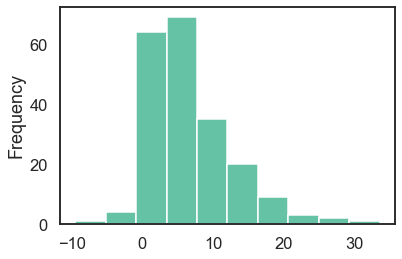

In [127]:
my[my.time_delta > -10].set_index('planned_start_time')['time_delta'].plot(kind='hist')

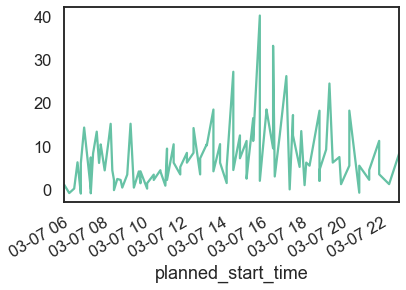

In [131]:
my[my.time_delta > -10].set_index('planned_start_time').time_delta.plot()

In [132]:
line_49 = get_route_times(siri_dir, '2019-03-07', 49, 25)
line_20 = get_route_times(siri_dir, '2019-03-07', 20, 25)

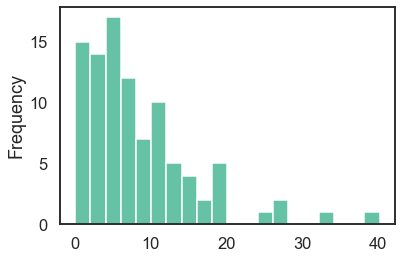

In [148]:
def plot(df):
    df[df.time_delta > 0].set_index('planned_start_time').time_delta.plot(kind='hist', bins=20)

plot(line_49)

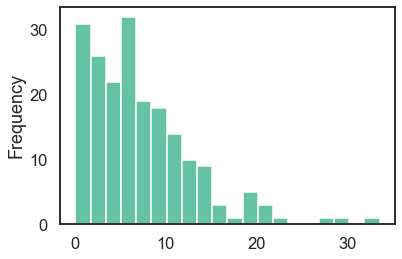

In [145]:
plot(line_20)

# Workflow
1. Define range of dates.
2. Define lines.
3. Download first date.
4. Analyze date.
5. Remove downloaded files.
6. Save file for seperate months.

In [6]:
from gtfs.gtfs_utils.gtfs_utils.configuration import configuration
from gtfs.gtfs_utils.gtfs_utils import environment
from gtfs.gtfs_utils.gtfs_utils import s3_wrapper

environment.init_conf()
configuration.s3

S3Configuration(access_key_id='P6OMDOFWYCQNTWE7XEPR', secret_access_key='glx9UFBOBNQCtYqSWIUW5OKWyhn9CedVb5tn7La5u6I', s3_endpoint_url='https://ams3.digitaloceanspaces.com', bucket_name='obus-do2')

In [7]:
crud = s3_wrapper.S3Crud.from_configuration(configuration.s3)


In [8]:
siri_li = s3_wrapper.list_content(crud, regex_argument='19\/03\/0[7-9]')
siri_li

[{'Key': 'gtfs/2019/03/07/2019-03-07T21-50-08_ChargingRavKav.zip',
  'LastModified': datetime.datetime(2019, 3, 7, 21, 52, 40, 660000, tzinfo=tzutc()),
  'ETag': '"abbdaa19a2320936ab24441dcd29cddf"',
  'Size': 6815,
  'StorageClass': 'STANDARD',
  'Owner': {'DisplayName': '1629867', 'ID': '1629867'}},
 {'Key': 'gtfs/2019/03/07/2019-03-07T21-50-09_ClusterToLine.zip',
  'LastModified': datetime.datetime(2019, 3, 7, 21, 52, 47, 511000, tzinfo=tzutc()),
  'ETag': '"efc507789845ddf00537a7c8dd099867"',
  'Size': 24813,
  'StorageClass': 'STANDARD',
  'Owner': {'DisplayName': '1629867', 'ID': '1629867'}},
 {'Key': 'gtfs/2019/03/07/2019-03-07T21-50-11_israel-public-transportation.zip',
  'LastModified': datetime.datetime(2019, 3, 7, 21, 52, 46, 727000, tzinfo=tzutc()),
  'ETag': '"a600b6528499fa32aa721e41b9b67f80-25"',
  'Size': 205006994,
  'StorageClass': 'STANDARD',
  'Owner': {'DisplayName': '1629867', 'ID': '1629867'}},
 {'Key': 'gtfs/2019/03/07/2019-03-07T21-52-30_Tariff.zip',
  'LastMod

In [9]:
start_date = '2019-04-01'
start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
days = 10
download_folder = 'C:\\Users\\Liad\\Projects\\open-bus\\testing\\siri'

In [10]:
def process_dates(download_folder, start_date, days, line, agency_id, remove=False):
    date_range = [start_date + datetime.timedelta(days=x) for x in range(days)]
    date_range = [datetime.datetime.strftime(x, '%Y-%m-%d') for x in date_range]
    df = pd.DataFrame()

    for date in date_range:

        # Download the dates files
        siri_files = s3_wrapper.list_content(crud, regex_argument=date)
        for file in siri_files:
            file_name = file['Key'].split('/')[-1]
            local_file = os.path.join(download_folder, file_name)
            print('Downloading', file_name)
            if not os.path.exists(local_file):
                s3_wrapper.download(crud, local_file, file['Key'])

        # Process the files
        print('Processing date', date)
        df = df.append(get_route_times(download_folder, date, line, agency_id))

        if remove:
            # Removing the files
            print('Removing files')
            for file in os.listdir(download_folder):
                os.remove(os.path.join(download_folder, file))
                
        return df

def process_dates_downloaded(download_folder,start_date, days, line, agency_id):
    date_range = [start_date + datetime.timedelta(days=x) for x in range(days)]
    date_range = [datetime.datetime.strftime(x, '%Y-%m-%d') for x in date_range]
    df = pd.DataFrame()
    
    for date in date_range:
        print(date)
        df = df.append(get_route_times(download_folder, date, line, agency_id))
    
    return df
    

In [133]:
line_20 = process_dates_downloaded(download_folder, start_date, 10, 20, 25)
line_20

2019-04-01
2019-04-02
2019-04-03
2019-04-04
2019-04-05


C:\Users\Liad\Anaconda3\envs\openbus\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


2019-04-06
2019-04-07
2019-04-08
2019-04-09
2019-04-10


,route_id,planned_start_time,predicted_end_time,timestamp,file,time_delta
0,16398,2019-04-01 06:00:00,2019-04-01 06:18:00,2019-04-01 06:19:09.660,siri_rt_data.2019-04-01.0.csv.gz,1.150000
1,16398,2019-04-01 07:00:00,2019-04-01 07:22:00,2019-04-01 07:23:21.801,siri_rt_data.2019-04-01.1.csv.gz,1.350000
2,16398,2019-04-01 08:30:00,2019-04-01 08:52:00,2019-04-01 08:51:25.070,siri_rt_data.2019-04-01.2.csv.gz,-0.566667
3,16398,2019-04-01 10:00:00,2019-04-01 10:17:00,2019-04-01 10:17:25.347,siri_rt_data.2019-04-01.2.csv.gz,0.416667
4,16398,2019-04-01 11:30:00,2019-04-01 11:47:00,2019-04-01 12:57:30.590,siri_rt_data.2019-04-01.4.csv.gz,70.500000
...,...,...,...,...,...,...
213,23822,2019-04-10 22:20:00,2019-04-10 23:09:00,2019-04-10 23:12:41.486,siri_rt_data.2019-04-10.12.csv.gz,3.683333
214,23822,2019-04-10 22:40:00,2019-04-10 23:24:00,2019-04-10 23:28:41.448,siri_rt_data.2019-04-10.12.csv.gz,4.683333
215,23822,2019-04-10 23:00:00,2019-04-10 23:46:00,2019-04-10 23:56:05.555,siri_rt_data.2019-04-10.12.csv.gz,10.083333
216,23822,2019-04-10 23:10:00,2019-04-10 00:03:00,2019-04-10 00:02:46.804,siri_rt_data.2019-04-10.0.csv.gz,-0.216667


In [12]:
line_20['start_hour'] = line_20.reset_index().planned_start_time.dt.time

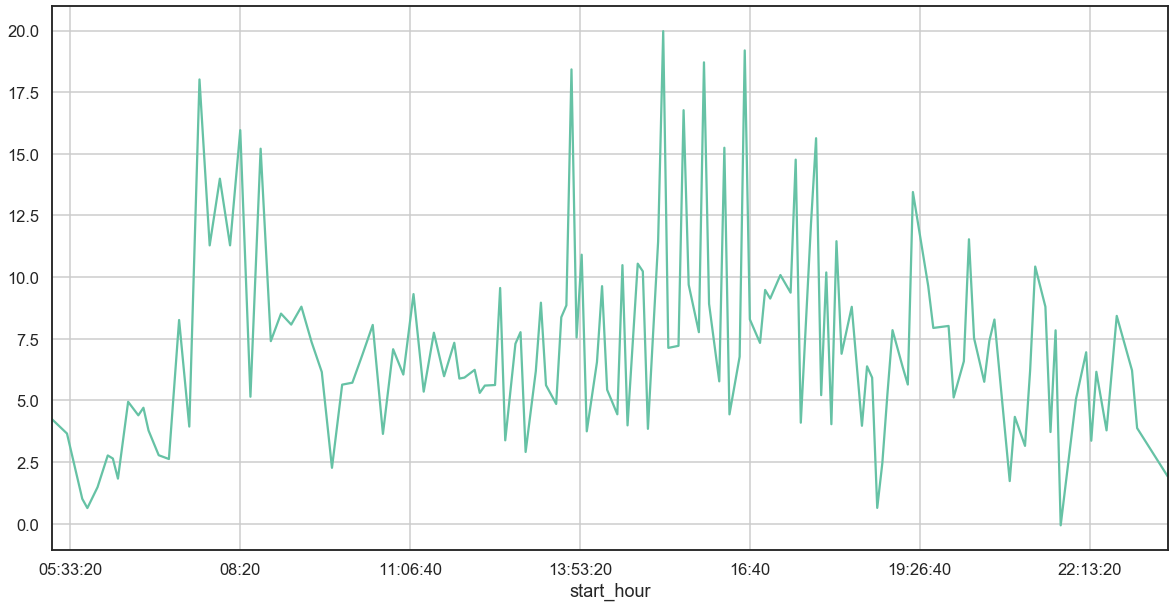

In [15]:
line_20[(line_20.time_delta < 90) & (line_20.time_delta > -20)].groupby('start_hour')['time_delta'].mean().plot(grid=True)

In [22]:
routes_file = 'gtfs_stats_hack\\2019-04-01_route_stats.pkl.gz'
trips_file = 'gtfs_stats_hack\\2019-04-01_trip_stats.pkl.gz'
with gzip.open(routes_file, 'rb') as f:
    routes = pickle.load(f)
with gzip.open(trips_file, 'rb') as f:
    trips = pickle.load(f)

'gtfs_stats_hack\\2019-04-01_route_stats.pkl.gz'

In [ ]:
n_line = line_20

In [33]:
routes[(routes.route_short_name == '20') & (routes.agency_id=='25')]

,route_id,route_short_name,agency_id,agency_name,route_long_name,route_type,route_mkt,route_direction,route_alternative,num_trips,num_trip_starts,num_trip_ends,is_loop,is_bidirectional,start_time,end_time,max_headway,min_headway,mean_headway,peak_num_trips,peak_start_time,peak_end_time,service_distance,service_duration,service_speed,mean_trip_distance,mean_trip_duration,start_stop_id,end_stop_id,start_stop_name,end_stop_name,start_stop_city,end_stop_city,start_stop_desc,end_stop_desc,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,num_stops,start_zone,end_zone,num_zones,num_zones_missing,all_stop_latlon,all_stop_code,all_stop_id,all_stop_desc_city,all_start_time,all_trip_id,date,gtfs_file_name
2390,16398,20,25,אפיקים,בית כנסת עץ אפריים/החרוב-עץ אפרים<->ת. רכבת רא...,3,40020,1,#,8,8,8,0,0,06:00:00,21:19:43,120.0,90.0,96.000000,1,06:00:00,06:19:43,121624,2.628889,46.264413,15203.0,0.328611,34407,16028,בית כנסת עץ אפריים/החרוב,ת. רכבת ראש העין צפון,עץ אפרים,דרום השרון,רחוב:החרוב 24 עיר: עץ אפרים רציף: קומה:,רחוב: עיר: דרום השרון רציף: קומה:,32.118996,35.047666,32.121176,34.934822,11,ראש העין שוהם,שרון,2,0,"32.118996,35.047666;32.119422,35.0445340000000...",63169;63168;65425;65426;63114;65283;63128;6311...,34407;34406;37811;37810;34352;35493;34366;4230...,עץ אפרים;עץ אפרים;עץ אפרים;עץ אפרים;אלקנה;אלקנ...,06:00:00;07:00:00;08:30:00;10:00:00;11:30:00;1...,19187795_310319;19187800_310319;19187805_31031...,2019-04-01,2019-03-31T21-50-12_israel-public-transportati...
2391,16399,20,25,אפיקים,בית כנסת עץ אפריים/החרוב-עץ אפרים<->ת. רכבת רא...,3,40020,1,1,1,1,1,0,0,18:30:00,19:42:24,NaN,NaN,NaN,1,18:30:00,19:42:24,37745,1.206667,31.280387,37745.0,1.206667,34407,16028,בית כנסת עץ אפריים/החרוב,ת. רכבת ראש העין צפון,עץ אפרים,דרום השרון,רחוב:החרוב 24 עיר: עץ אפרים רציף: קומה:,רחוב: עיר: דרום השרון רציף: קומה:,32.118996,35.047666,32.121176,34.934822,47,ראש העין שוהם,שרון,2,0,"32.118996,35.047666;32.119422,35.0445340000000...",63169;63168;65425;65426;63583;63592;63114;6528...,34407;34406;37811;37810;34801;34810;34352;3549...,עץ אפרים;עץ אפרים;עץ אפרים;עץ אפרים;אלקנה;אלקנ...,18:30:00,36758098_310319,2019-04-01,2019-03-31T21-50-12_israel-public-transportati...
2392,16400,20,25,אפיקים,ת. רכבת ראש העין צפון-דרום השרון<->בית כנסת עץ...,3,40020,2,#,5,5,5,0,0,08:30:00,20:21:51,315.0,70.0,180.000000,1,08:30:00,08:51:51,79770,1.820833,43.809611,15954.0,0.364167,16028,34407,ת. רכבת ראש העין צפון,בית כנסת עץ אפריים/החרוב,דרום השרון,עץ אפרים,רחוב: עיר: דרום השרון רציף: קומה:,רחוב:החרוב 24 עיר: עץ אפרים רציף: קומה:,32.121176,34.934822,32.118996,35.047666,13,שרון,ראש העין שוהם,2,0,"32.121176,34.934822;32.123156,34.93743;32.1148...",32052;39707;39709;39661;63111;63129;65282;6311...,16028;750;751;728;42301;34367;35492;34353;3781...,דרום השרון;דרום השרון;ראש העין;ראש העין;שומרון...,08:30:00;13:45:00;16:20:00;17:30:00;20:00:00,19945353_310319;19945358_310319;19945363_31031...,2019-04-01,2019-03-31T21-50-12_israel-public-transportati...
2393,16401,20,25,אפיקים,ת. רכבת ראש העין צפון-דרום השרון<->בית כנסת עץ...,3,40020,2,1,2,2,2,0,0,18:45:00,22:55:37,NaN,NaN,NaN,1,18:45:00,19:55:37,74606,2.353889,31.694784,37303.0,1.176944,16028,34407,ת. רכבת ראש העין צפון,בית כנסת עץ אפריים/החרוב,דרום השרון,עץ אפרים,רחוב: עיר: דרום השרון רציף: קומה:,רחוב:החרוב 24 עיר: עץ אפרים רציף: קומה:,32.121176,34.934822,32.118996,35.047666,51,שרון,ראש העין שוהם,2,0,"32.121176,34.934822;32.123156,34.93743;32.1148...",32052;39707;39709;39661;65291;65241;63099;3971...,16028;750;751;728;35507;34227;34337;754;755;75...,דרום השרון;דרום השרון;ראש העין;ראש העין;שומרון...,18:45:00;21:45:00,19187860_310319;19187865_310319,2019-04-01,2019-03-31T21-50-12_israel-public-transportati...
3093,18000,20,25,אפיקים,מסוף הריביירה-אשדוד<->הבושם/האומן-אשדוד-1#,3,37020,1,#,48,48,48,0,0,05:30:00,22:38:15,20.0,20.0,20.000000,2,05:50:00,05:58:15,529152,22.600000,23.413805,11024.0,0.470833,35404,26372,מסוף הריביירה,הבושם/האומן,אשדוד,אשדוד,רחוב: עיר: אשדוד רציף: קומה:,רחוב:הבושם 5 עיר: אשדוד רציף: קומה:,31.772632,

In [143]:
s_trips = trips[trips.route_mkt=='47020'][['route_id', 'start_time', 'route_long_name', 'start_stop_city', 'end_time']]

In [134]:
n_line['start_time'] = n_line.planned_start_time.apply(lambda x: x.strftime('%H:%M:%S'))
n_line['route_id'] = n_line.route_id.apply(str)

,route_id,planned_start_time,predicted_end_time,timestamp,file,time_delta,start_time
0,16398,2019-04-01 06:00:00,2019-04-01 06:18:00,2019-04-01 06:19:09.660,siri_rt_data.2019-04-01.0.csv.gz,1.150000,06:00:00
1,16398,2019-04-01 07:00:00,2019-04-01 07:22:00,2019-04-01 07:23:21.801,siri_rt_data.2019-04-01.1.csv.gz,1.350000,07:00:00
2,16398,2019-04-01 08:30:00,2019-04-01 08:52:00,2019-04-01 08:51:25.070,siri_rt_data.2019-04-01.2.csv.gz,-0.566667,08:30:00
3,16398,2019-04-01 10:00:00,2019-04-01 10:17:00,2019-04-01 10:17:25.347,siri_rt_data.2019-04-01.2.csv.gz,0.416667,10:00:00
4,16398,2019-04-01 11:30:00,2019-04-01 11:47:00,2019-04-01 12:57:30.590,siri_rt_data.2019-04-01.4.csv.gz,70.500000,11:30:00
...,...,...,...,...,...,...,...
213,23822,2019-04-10 22:20:00,2019-04-10 23:09:00,2019-04-10 23:12:41.486,siri_rt_data.2019-04-10.12.csv.gz,3.683333,22:20:00
214,23822,2019-04-10 22:40:00,2019-04-10 23:24:00,2019-04-10 23:28:41.448,siri_rt_data.2019-04-10.12.csv.gz,4.683333,22:40:00
215,23822,2019-04-10 23:00:00,2019-04-10 23:46:00,2019-04-10 23:56:05.555,siri_rt_data.2019-04-10.12.csv.gz,10.083333,23:00:00
216,23822,2019-04-10 23:10:00,2019-04-10 00:03:00,2019-04-10 00:02:46.804,siri_rt_data.2019-04-10.0.csv.gz,-0.216667,23:10:00


In [144]:
n_line.merge(s_trips, on=['route_id', 'start_time'])

,route_id,planned_start_time,predicted_end_time,timestamp,file,time_delta,start_time,route_long_name,start_stop_city,end_time
0,23821,2019-04-01 05:15:00,2019-04-01 06:10:00,2019-04-01 06:13:20.158,siri_rt_data.2019-04-01.0.csv.gz,3.333333,05:15:00,בית חולים בית רבקה-פתח תקווה<->מרכז אזורי חן-ת...,פתח תקווה,06:18:18
1,23821,2019-04-02 05:15:00,2019-04-02 06:10:00,2019-04-02 06:15:19.505,siri_rt_data.2019-04-02.0.csv.gz,5.316667,05:15:00,בית חולים בית רבקה-פתח תקווה<->מרכז אזורי חן-ת...,פתח תקווה,06:18:18
2,23821,2019-04-03 05:15:00,2019-04-03 06:06:00,2019-04-03 06:12:20.085,siri_rt_data.2019-04-03.0.csv.gz,6.333333,05:15:00,בית חולים בית רבקה-פתח תקווה<->מרכז אזורי חן-ת...,פתח תקווה,06:18:18
3,23821,2019-04-04 05:15:00,2019-04-04 06:08:00,2019-04-04 06:07:18.974,siri_rt_data.2019-04-04.0.csv.gz,-0.683333,05:15:00,בית חולים בית רבקה-פתח תקווה<->מרכז אזורי חן-ת...,פתח תקווה,06:18:18
4,23821,2019-04-05 05:15:00,2019-04-05 06:02:00,2019-04-05 06:08:19.613,siri_rt_data.2019-04-05.0.csv.gz,6.316667,05:15:00,בית חולים בית רבקה-פתח תקווה<->מרכז אזורי חן-ת...,פתח תקווה,06:18:18
...,...,...,...,...,...,...,...,...,...,...
806,23821,2019-04-05 23:35:00,2019-04-05 00:23:00,2019-04-05 00:07:08.311,siri_rt_data.2019-04-05.0.csv.gz,-15.850000,23:35:00,בית חולים בית רבקה-פתח תקווה<->מרכז אזורי חן-ת...,פתח תקווה,24:38:18
807,23821,2019-04-09 23:35:00,2019-04-09 00:18:00,2019-04-09 00:17:01.307,siri_rt_data.2019-04-09.0.csv.gz,-0.966667,23:35:00,בית חולים בית רבקה-פתח תקווה<->מרכז אזורי חן-ת...,פתח תקווה,24:38:18
808,23822,2019-04-05 00:10:00,2019-04-05 00:57:00,2019-04-05 01:01:42.359,siri_rt_data.2019-04-05.0.csv.gz,4.700000,00:10:00,מרכז אזורי חן-תל אביב יפו<->בית רבקה-פתח תקווה-20,תל אביב יפו,01:18:57
809,23822,2019-04-05 23:20:00,2019-04-05 00:09:00,2019-04-05 00:07:07.767,siri_rt_data.2019-04-05.0.csv.gz,-1.866667,23:20:00,מרכז אזורי חן-תל אביב יפו<->בית רבקה-פתח תקווה-20,תל אביב יפו,24:28:57


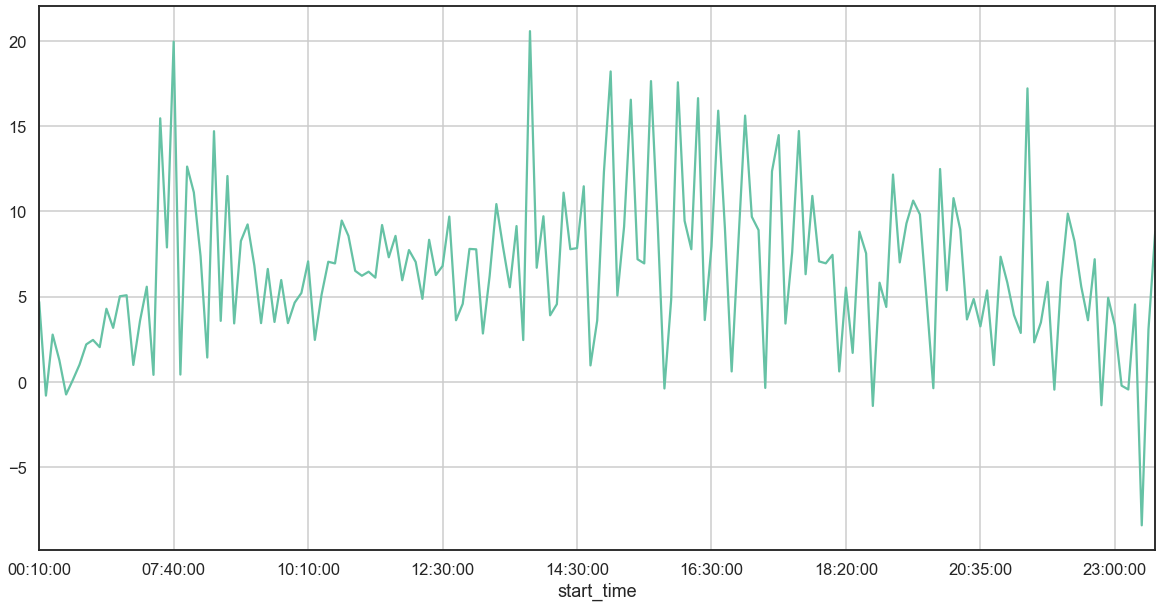

In [146]:
n_line[(n_line.time_delta < 90) & (n_line.time_delta > -20)].groupby('start_time')['time_delta'].mean().plot(grid=True)

In [149]:
pd.read_csv('line_20.csv')

,Unnamed: 0,route_id,planned_start_time,predicted_end_time,timestamp,file,time_delta,start_hour
0,0,17905,2019-04-01 05:05:00.000,2019-04-01 05:48:00.000,2019-04-01 05:50:17.277,siri_rt_data.2019-04-01.0.csv.gz,2.283333,05:05:00
1,1,17905,2019-04-01 05:25:00.000,2019-04-01 06:07:00.000,2019-04-01 06:07:20.399,siri_rt_data.2019-04-01.0.csv.gz,0.333333,05:25:00
2,2,17905,2019-04-01 05:45:00.000,2019-04-01 06:26:00.000,2019-04-01 06:26:22.762,siri_rt_data.2019-04-01.0.csv.gz,0.366667,05:45:00
3,3,17905,2019-04-01 06:00:00.000,2019-04-01 06:48:00.000,2019-04-01 06:47:28.041,siri_rt_data.2019-04-01.0.csv.gz,-0.516667,06:00:00
4,4,17905,2019-04-01 06:15:00.000,2019-04-01 07:04:00.000,2019-04-01 07:05:33.304,siri_rt_data.2019-04-01.0.csv.gz,1.550000,06:15:00
...,...,...,...,...,...,...,...,...
1206,138,17906,2019-04-10 22:20:00.000,2019-04-10 23:06:00.000,2019-04-10 23:12:26.235,siri_rt_data.2019-04-10.12.csv.gz,6.433333,22:20:00
1207,139,17906,2019-04-10 22:40:00.000,2019-04-10 23:26:00.000,2019-04-10 23:29:26.182,siri_rt_data.2019-04-10.12.csv.gz,3.433333,22:40:00
1208,140,17906,2019-04-10 23:00:00.000,2019-04-10 23:44:00.000,2019-04-10 23:44:26.129,siri_rt_data.2019-04-10.12.csv.gz,0.433333,23:00:00
1209,141,23377,2019-04-10 22:40:00.000,2019-04-10 23:15:00.000,2019-04-10 23:13:58.479,siri_rt_data.2019-04-10.12.csv.gz,-1.016667,22:40:00


In [151]:
routes[(routes.agency_id=='25') & (routes.route_short_name=='64')]

,route_id,route_short_name,agency_id,agency_name,route_long_name,route_type,route_mkt,route_direction,route_alternative,num_trips,num_trip_starts,num_trip_ends,is_loop,is_bidirectional,start_time,end_time,max_headway,min_headway,mean_headway,peak_num_trips,peak_start_time,peak_end_time,service_distance,service_duration,service_speed,mean_trip_distance,mean_trip_duration,start_stop_id,end_stop_id,start_stop_name,end_stop_name,start_stop_city,end_stop_city,start_stop_desc,end_stop_desc,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,num_stops,start_zone,end_zone,num_zones,num_zones_missing,all_stop_latlon,all_stop_code,all_stop_id,all_stop_desc_city,all_start_time,all_trip_id,date,gtfs_file_name
3048,17905,64,25,אפיקים,ספורטק/הרב עובדיה יוסף-פתח תקווה<->ת. מרכזית ת...,3,26064,1,0,72,72,72,0,0,05:05:00,23:13:17,20.0,10.0,13.333333,6,11:50:00,11:53:17,1286136,63.940000,20.114733,17863.0,0.888056,16281,13319,ספורטק/הרב עובדיה יוסף,ת. מרכזית ת''א ק. 7/הורדה,פתח תקווה,תל אביב יפו,רחוב:הרב עובדיה יוסף עיר: פתח תקווה רציף: ק...,רחוב:תחנה מרכזית קומה 7 עיר: תל אביב יפו רציף...,32.081556,34.906091,32.055636,34.780466,40,גוש דן,גוש דן,1,0,"32.081556,34.906090999999996;32.08276,34.90306...",32352;38304;31593;31191;32492;31607;31606;3233...,16281;25267;15803;15522;16416;15813;15812;1626...,פתח תקווה;פתח תקווה;פתח תקווה;פתח תקווה;פתח תק...,05:05:00;05:25:00;05:45:00;06:00:00;06:15:00;0...,37256950_310319;37256951_310319;37256952_31031...,2019-04-01,2019-03-31T21-50-12_israel-public-transportati...
3049,17906,64,25,אפיקים,ת.מרכזית ת''א ק.7/רציפים-תל אביב יפו<->הרב עוב...,3,26064,2,0,71,71,69,0,0,06:15:00,24:34:43,45.0,10.0,13.846154,6,12:50:00,12:54:43,1378039,64.748056,21.283095,19409.0,0.911944,36198,16282,ת.מרכזית ת''א ק.7/רציפים,הרב עובדיה יוסף/יקותיאל אדם,תל אביב יפו,פתח תקווה,רחוב:תמח''ת קומה 7 עיר: תל אביב יפו רציף: 8 ...,רחוב:הרב עובדיה יוסף עיר: פתח תקווה רציף: ק...,32.056413,34.779452,32.082103,34.904194,38,גוש דן,גוש דן,1,0,"32.056413,34.779452;32.056416999999996,34.7764...",22955;21554;27124;21752;21179;21397;21721;2148...,36198;13150;14376;13233;12904;13055;13223;1311...,תל אביב יפו;תל אביב יפו;תל אביב יפו;תל אביב יפ...,06:15:00;06:45:00;07:00:00;07:45:00;08:15:00;0...,37257422_310319;37257423_310319;37257424_31031...,2019-04-01,2019-03-31T21-50-12_israel-public-transportati...
4216,23377,64,25,אפיקים,ספורטק/הרב עובדיה יוסף-פתח תקווה<->ת. מרכזית ת...,3,26064,1,1,5,5,3,0,0,00:00:00,24:34:37,NaN,NaN,NaN,3,23:20:00,23:34:37,90115,4.551389,19.799451,18023.0,0.910278,16281,13355,ספורטק/הרב עובדיה יוסף,ת. מרכזית ת''א/לוינסקי,פתח תקווה,תל אביב יפו,רחוב:הרב עובדיה יוסף עיר: פתח תקווה רציף: ק...,רחוב:לוינסקי 113 עיר: תל אביב יפו רציף: קומה:,32.081556,34.906091,32.056456,34.780692,41,גוש דן,גוש דן,1,0,"32.081556,34.906090999999996;32.08276,34.90306...",32352;38304;31593;31191;32492;31607;31606;3233...,16281;25267;15803;15522;16416;15813;15812;1626...,פתח תקווה;פתח תקווה;פתח תקווה;פתח תקווה;פתח תק...,00:00:00;22:40:00;23:00:00;23:20:00;23:40:00,35686499_310319;35686500_310319;35686501_31031...,2019-04-01,2019-03-31T21-50-12_israel-public-transportati...
4217,23378,64,25,אפיקים,ת. מרכזית ת''א/לוינסקי-תל אביב יפו<->הרב עובדי...,3,26064,2,1,5,5,5,0,0,00:00:00,02:12:37,NaN,NaN,NaN,3,00:40:00,00:52:37,93925,4.384722,21.420969,18785.0,0.876944,13355,16282,ת. מרכזית ת''א/לוינסקי,הרב עובדיה יוסף/יקותיאל אדם,תל אביב יפו,פתח תקווה,רחוב:לוינסקי 113 עיר: תל אביב יפו רציף: קומה:,רחוב:הרב עובדיה יוסף עיר: פתח תקווה רציף: ק...,32.056456,34.780692,32.082103,34.904194,37,גוש דן,גוש דן,1,0,"32.056456,34.780691999999995;32.058355,34.7775...",24090;27124;21752;21179;21397;21721;21484;2173...,13355;14376;13233;12904;13055;13223;13111;1322...,תל אביב יפו;תל אביב יפו;תל אביב יפו;תל אביב יפ...,00:00:00;00:20:00;00:40:00;01:00:00;01:20:00,33629226_310319;33629230_310319;33629234_31031...,2019-04-01,2019-03-31T21-50-12_israel-public-transportati...
